In [152]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

def concat_csv_files_from_folders(folder_paths):
    # List to hold dataframes
    df_list = []

    # Loop through each folder
    for folder_path in folder_paths:
        # Loop through each file in the folder
        for file in os.listdir(folder_path):
            # Check if the file is a CSV
            if file.endswith('.csv'):
                file_path = os.path.join(folder_path, file)
                df = pd.read_csv(file_path)
                df_list.append(df)

    # Concatenate all dataframes
    concatenated_df = pd.concat(df_list, ignore_index=True)

    return concatenated_df

In [153]:
shakir = '../psychopy/data/Shakir/'
sidd = '../psychopy/data/Sidd/' 
weronika = '../psychopy/data/'

In [154]:
concatenated_df = concat_csv_files_from_folders([shakir, sidd, weronika])

In [155]:
print(concatenated_df.shape)

concatenated_df.dropna(subset=['key_resp_2.keys'], inplace=True)

(4680, 25)


In [156]:
concatenated_df = concatenated_df[['thisRow.t', 'key_resp_2.keys', 'key_resp_2.corr', 'letter.routineEndVal', 'type.routineEndVal', 'key_resp_2.rt', 'participant', 'session', 'date']]

concatenated_df['session'] = concatenated_df['session'].str.replace('none', 'silence')

In [157]:
concatenated_df.to_csv('../combined_df.csv', index=False)

In [158]:
concatenated_df.head()

,thisRow.t,key_resp_2.keys,key_resp_2.corr,letter.routineEndVal,type.routineEndVal,key_resp_2.rt,participant,session,date
0,2.175891,None,1.0,Y,1.0,NaN,104,brown,2023-11-07_13h23.30.456
1,4.259628,['space'],1.0,Y,1.0,[0.5674374169902876],104,brown,2023-11-07_13h23.30.456
2,6.344430,None,1.0,O,1.0,NaN,104,brown,2023-11-07_13h23.30.456
3,8.432706,None,1.0,Q,1.0,NaN,104,brown,2023-11-07_13h23.30.456
4,10.526235,['space'],1.0,Q,1.0,[0.4988597920018947],104,brown,2023-11-07_13h23.30.456


In [159]:
data = concatenated_df.copy()

# Cleaning

## Converting reaction time to float
data['key_resp_2.rt'] = data['key_resp_2.rt'].str.split(',').str[0].str.strip('[]').astype(float)

## Removing outliers

### Calculating IQR
Q1 = data['key_resp_2.rt'].quantile(0.25)
Q3 = data['key_resp_2.rt'].quantile(0.75)
IQR = Q3 - Q1

### Defining outliers as any value below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

### Filtering out the outliers
data_no_outliers = data[(data['key_resp_2.rt'] >= lower_bound) & (data['key_resp_2.rt'] <= upper_bound)]

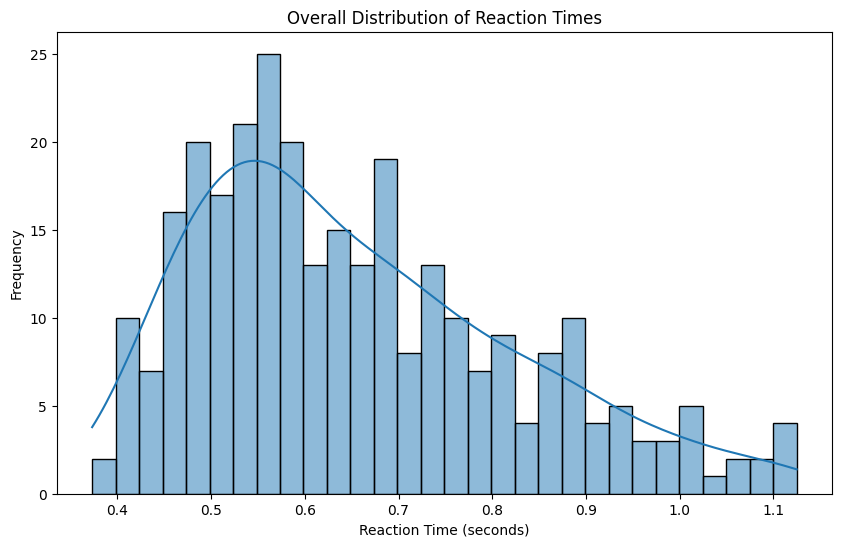

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['key_resp_2.rt'].dropna(), kde=True, bins=30)
plt.title('Overall Distribution of Reaction Times')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Frequency')
plt.show()

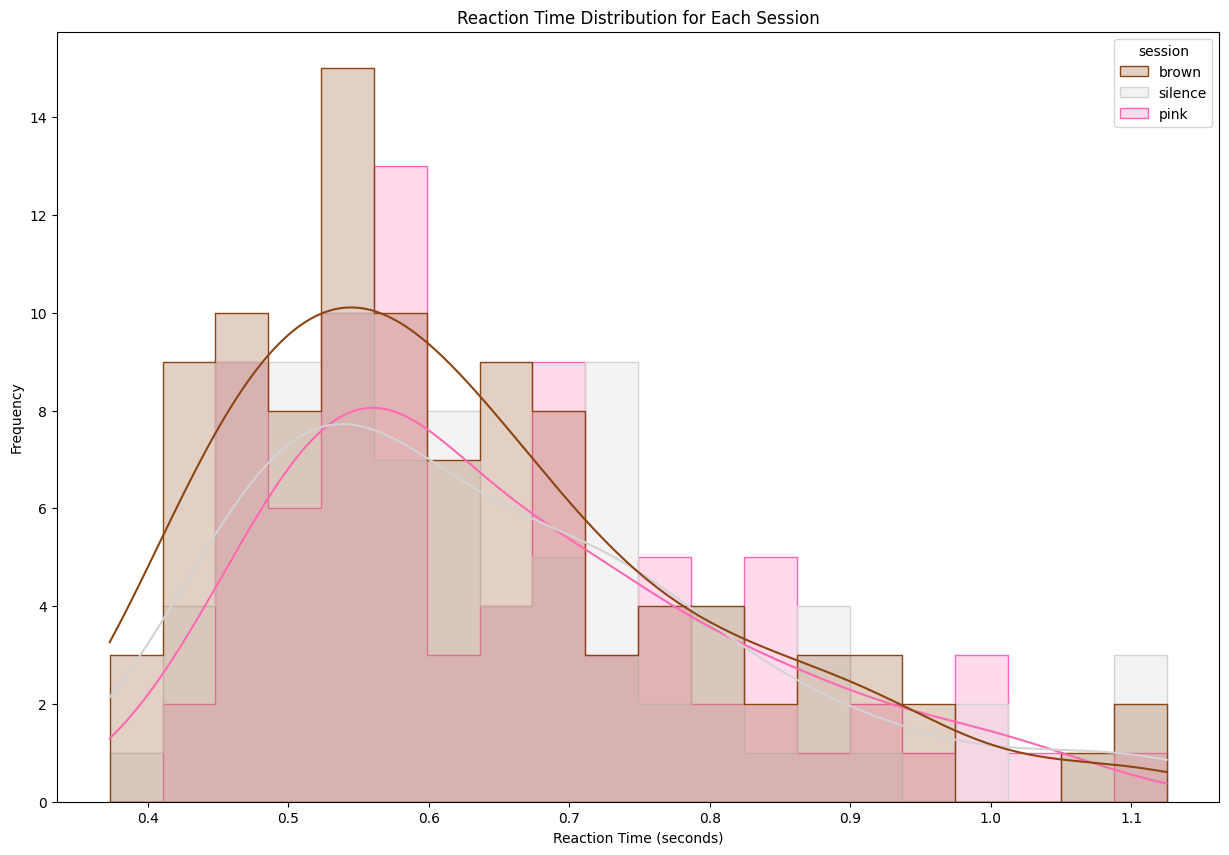

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

data_no_outliers_corr = data_no_outliers[data_no_outliers['key_resp_2.corr'] == 1]

unique_sessions = data['session'].unique()

custom_palette = {
    'brown': '#8B4513',  
    'pink': '#FF69B4',   
    'silence': '#D3D3D3' 
}

plt.figure(figsize=(15, 10))
hist_plot = sns.histplot(data_no_outliers_corr, x="key_resp_2.rt", hue="session", element="step", palette=custom_palette, bins=20, kde=True)

if not hist_plot.legend_:
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in custom_palette.values()]
    plt.legend(handles, custom_palette.keys(), title='Session')

plt.title('Reaction Time Distribution for Each Session')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Frequency')
plt.show()

/var/folders/r7/5qjvym7502z0hk7l29b80j640000gn/T/ipykernel_19947/823252981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['date'] = pd.to_datetime(data_no_outliers['date'], format='%Y-%m-%d_%Hh%M.%S.%f')
/var/folders/r7/5qjvym7502z0hk7l29b80j640000gn/T/ipykernel_19947/823252981.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['hour'] = data_no_outliers['date'].dt.hour


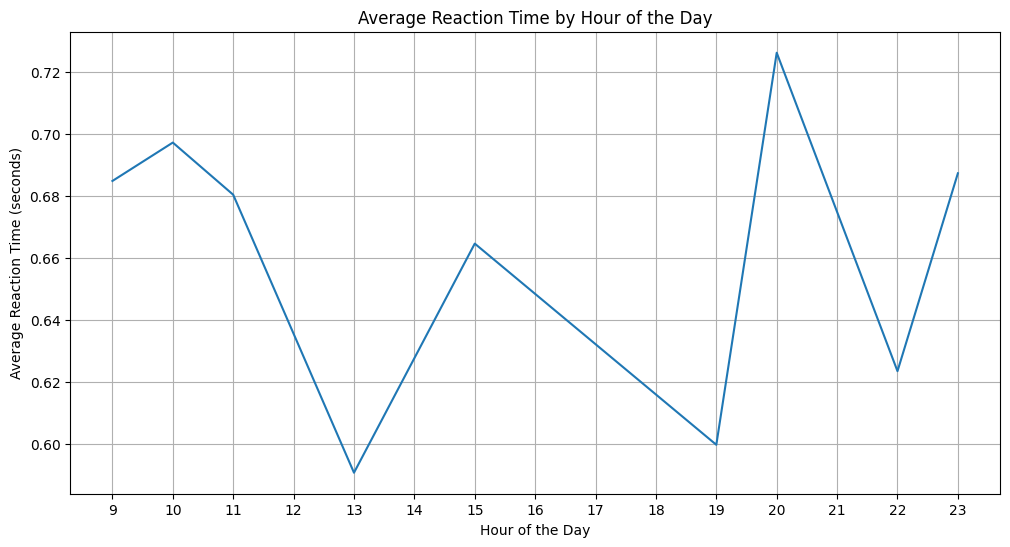

In [163]:
data_no_outliers['date'] = pd.to_datetime(data_no_outliers['date'], format='%Y-%m-%d_%Hh%M.%S.%f')
data_no_outliers['hour'] = data_no_outliers['date'].dt.hour

average_reaction_time_by_hour = data_no_outliers.groupby('hour')['key_resp_2.rt'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_reaction_time_by_hour.index, y=average_reaction_time_by_hour.values)
plt.title('Average Reaction Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Reaction Time (seconds)')
plt.xticks(np.arange(9, 24, 1))
plt.grid(True)
plt.show()

/var/folders/r7/5qjvym7502z0hk7l29b80j640000gn/T/ipykernel_19947/4247681673.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_reaction_time_by_letter_sorted.index, y=average_reaction_time_by_letter_sorted.values, palette=palette)


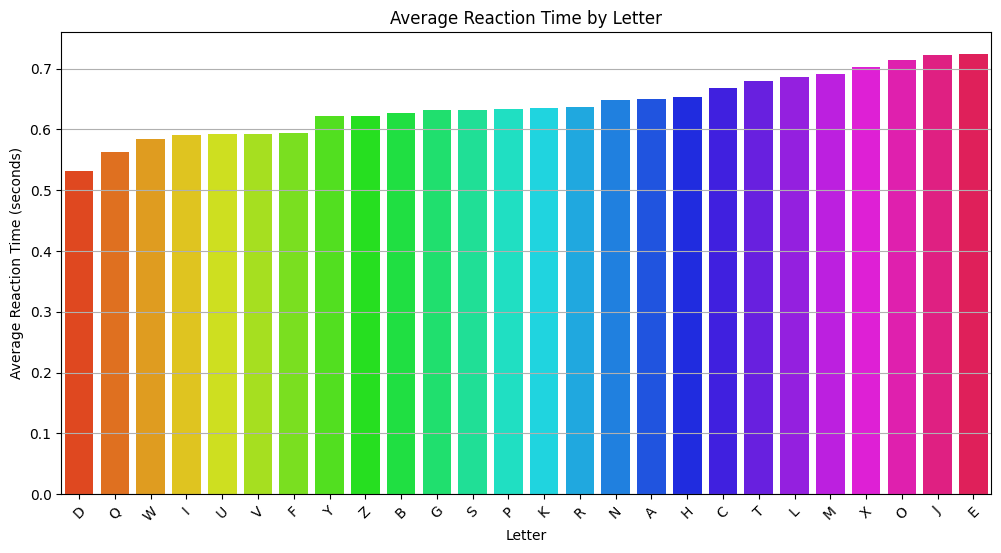

In [168]:
average_reaction_time_by_letter = data_no_outliers_corr.groupby('letter.routineEndVal')['key_resp_2.rt'].mean()

average_reaction_time_by_letter_sorted = average_reaction_time_by_letter.sort_values()

palette = sns.color_palette("hsv", n_colors=len(average_reaction_time_by_letter_sorted))

plt.figure(figsize=(12, 6))
sns.barplot(x=average_reaction_time_by_letter_sorted.index, y=average_reaction_time_by_letter_sorted.values, palette=palette)
plt.title('Average Reaction Time by Letter')
plt.xlabel('Letter')
plt.ylabel('Average Reaction Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()